In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
from matplotlib import cm

import pandas as pd
import numpy as np
#import seaborn as sns

# Select Colors

In [3]:
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

#zesty_color_palette 
color0 = colors["mediumblue"]
color1 = colors["coral"]
color2 = colors["deepskyblue"] #"deepskyblue"
color3 = colors["mediumorchid"]

zesty_color_palette = [color0, color1, color2, color3]

# Make a barplot to check colors

In [4]:
def barplot_with_CI_errorbars(df, x_label, y_label, y_lower_label, y_upper_label, figsize=False):
    """Creates bar plot of a given dataframe with asymmetric error bars for y axis.

    Args:
        df: Pandas Dataframe that should have columns with columnnames specified in other arguments.
        x_label: str, column name of x axis categories
        y_label: str, column name of y axis values
        y_lower_label: str, column name of lower error values of y axis
        y_upper_label: str, column name of upper error values of y axis
        figsize: tuple, size in inches. Default value is False.

    """
    # Column names for new columns for delta y_err which is calculated as | y_err - y |
    delta_lower_yerr_label = "$\Delta$" + y_lower_label
    delta_upper_yerr_label = "$\Delta$" + y_upper_label
    data = df  # Pandas DataFrame
    data.loc[:,delta_lower_yerr_label] = data.loc[:,y_label] - data.loc[:,y_lower_label]
    data.loc[:,delta_upper_yerr_label] = data.loc[:,y_upper_label] - data.loc[:,y_label]

    # Color
    #current_palette = sns.color_palette()
    #sns_color = current_palette[2]

    # Plot style
    plt.close()
    plt.style.use(["seaborn-talk", "seaborn-whitegrid"])
    plt.rcParams['axes.labelsize'] = 20 # 18
    plt.rcParams['xtick.labelsize'] = 14
    plt.rcParams['ytick.labelsize'] = 18 #16
    plt.rcParams['legend.fontsize'] = 16
    plt.rcParams['legend.handlelength'] = 2
    #plt.tight_layout()

    # If figsize is specified
    if figsize != False:
        plt.figure(figsize=figsize)

    # Plot
    x = range(len(data[y_label]))
    y = data[y_label]
    plt.bar(x[0], y[0], color=color0)
    plt.bar(x[1], y[1], color=color1)
    plt.bar(x[2], y[2], color=color2)
    plt.bar(x[3], y[3], color=color3)
    plt.xticks(x, data[x_label], rotation=90)
    plt.errorbar(x, y, yerr=(data[delta_lower_yerr_label], data[delta_upper_yerr_label]),
                 fmt="none", ecolor="grey", capsize=3, capthick=True)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

In [5]:
data = [["aaaaa", 10, 9, 11], ["bbbbb", 9, 7, 10], ["cccccc", 2, 0, 2.5], ["ddddd", 5, 3.5, 8]]
df = pd.DataFrame(data, columns = ['ID', 'RMSE', 'RMSE_lower_CI', 'RMSE_upper_CI']) 
df 

,ID,RMSE,RMSE_lower_CI,RMSE_upper_CI
0,aaaaa,10,9.0,11.0
1,bbbbb,9,7.0,10.0
2,cccccc,2,0.0,2.5
3,ddddd,5,3.5,8.0


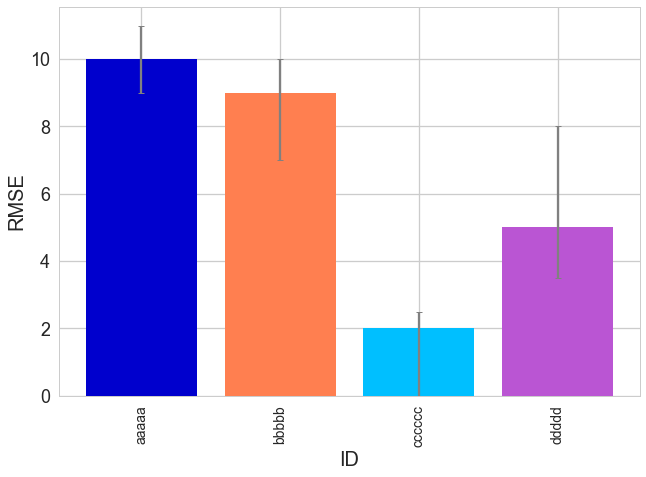

In [6]:
barplot_with_CI_errorbars(df=df, x_label="ID", y_label="RMSE", y_lower_label="RMSE_lower_CI", y_upper_label="RMSE_upper_CI", figsize=False)

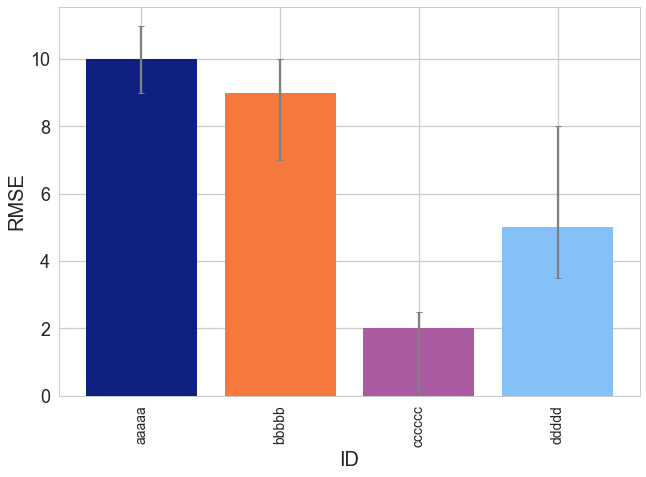

In [11]:
#zesty_color_palette 
color0 = "#0F2080"
color1 = "#F5793A"
color2 = "#A95AA1"
color3 = "#85C0F9" 

zesty_color_palette = [color0, color1, color2, color3]

barplot_with_CI_errorbars(df=df, x_label="ID", y_label="RMSE", y_lower_label="RMSE_lower_CI", y_upper_label="RMSE_upper_CI", figsize=False)